In [ ]:
# Now the results are inside 
# parallel-large-1.txt
# parallel-large-16.txt
# parallel-large-36.txt
# parallel-large-4.txt
# parallel-small-1.txt
# parallel-small-16.txt
# parallel-small-36.txt
# parallel-small-4.txt
# serial-large.txt
# serial-small.txt

# the number of processor is 1, 4, 16, 36

# please read the results and create a table to show the speedup and efficiency of the parallel program
# and plot the speedup and efficiency

# you need to create 2 table, one for small data set, one for large data set
# and 2 figures for the speedup and efficiency

# the result in each file has such format:
# Sum is:  2.93378e+07
# Sum of square is:  6.85835e+09
# Time: 0.558044

# Now give me the code

In [2]:
files = {
    'small': {
        1: 'parallel-small-1.txt',
        4: 'parallel-small-4.txt',
        16: 'parallel-small-16.txt',
        36: 'parallel-small-36.txt',
        'serial': 'serial-small.txt'
    },
    'large': {
        1: 'parallel-large-1.txt',
        4: 'parallel-large-4.txt',
        16: 'parallel-large-16.txt',
        36: 'parallel-large-36.txt',
        'serial': 'serial-large.txt'
    }
}

|    |   Processors |   Time Used |         Sum |   Sum of Square |   Speedup |   Efficiency |
|---:|-------------:|------------:|------------:|----------------:|----------:|-------------:|
|  0 |            1 |   19.5223   | 3.00558e+07 |     6.8623e+09  |  1        |     1        |
|  1 |            1 |   19.5723   | 3.00558e+07 |     6.8623e+09  |  0.997445 |     0.997445 |
|  2 |            4 |    5.16902  | 3.0017e+07  |     6.86206e+09 |  3.77679  |     0.944197 |
|  3 |           16 |    6.46973  | 2.99472e+07 |     6.86155e+09 |  3.01748  |     0.188593 |
|  4 |           36 |    0.558044 | 2.93378e+07 |     6.85835e+09 | 34.9834   |     0.971762 |


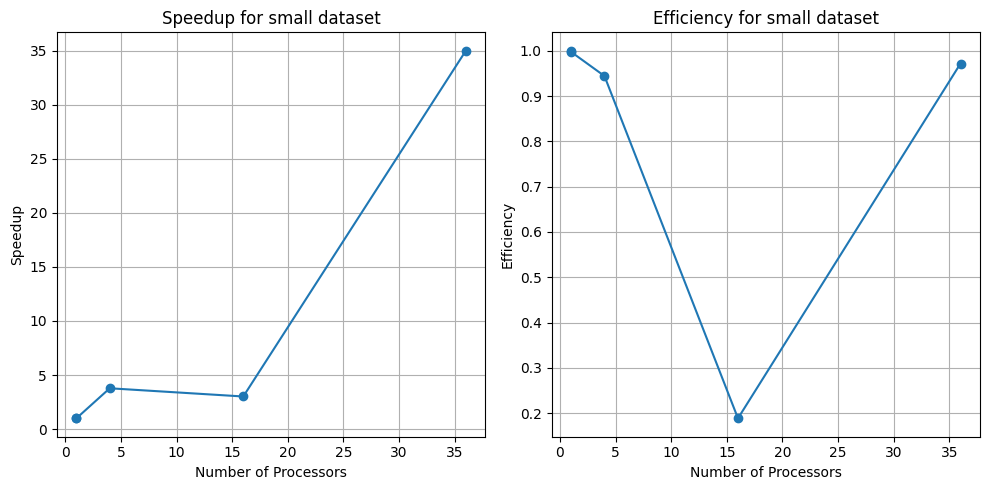

|    |   Processors |   Time Used |         Sum |   Sum of Square |   Speedup |   Efficiency |
|---:|-------------:|------------:|------------:|----------------:|----------:|-------------:|
|  0 |            1 |    79.207   | 1.06397e+08 |     1.4104e+10  |   1       |     1        |
|  1 |            1 |    78.4965  | 1.06397e+08 |     1.4104e+10  |   1.00905 |     1.00905  |
|  2 |            4 |    19.9741  | 1.06476e+08 |     1.41044e+10 |   3.96549 |     0.991371 |
|  3 |           16 |    26.0777  | 1.05891e+08 |     1.41016e+10 |   3.03735 |     0.189834 |
|  4 |           36 |     2.29548 | 1.05441e+08 |     1.40994e+10 |  34.5056  |     0.95849  |


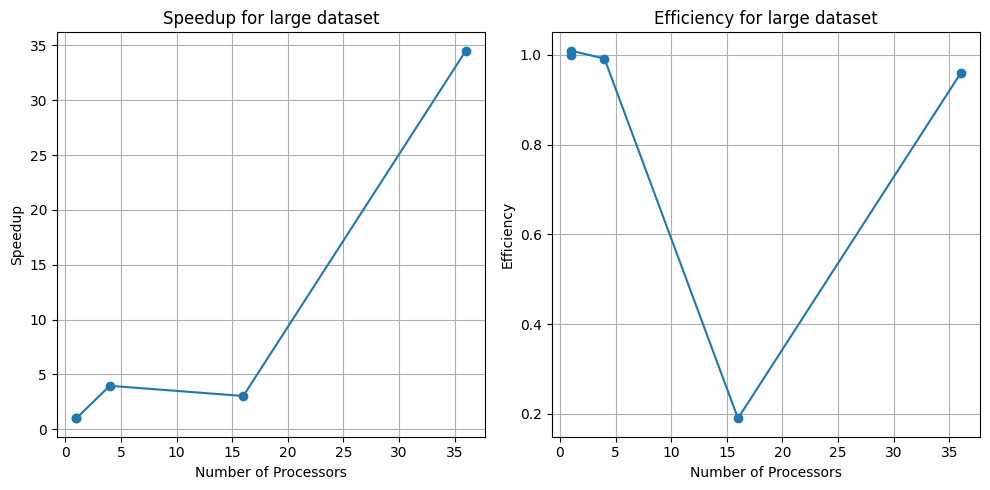

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
def read_everything_from_file(filename):
    latency = 0
    sum_value = 0  # Renamed to avoid conflict with built-in 'sum'
    sum_of_square = 0
    with open(filename, 'r') as file:
        for line in file:
            if line.startswith("Time:"):
                latency = float(line.split()[1])
            elif line.startswith("Sum is:"):
                sum_value = float(line.split()[2])
            elif line.startswith("Sum of square is:"):
                sum_of_square = float(line.split()[4])
    return latency, sum_value, sum_of_square

def plot_speedup_efficiency(df, dataset_name):
    plt.figure(figsize=(10, 5))

    # Plot speedup
    plt.subplot(1, 2, 1)
    plt.plot(df['Processors'], df['Speedup'], marker='o', label='Speedup')
    plt.xlabel('Number of Processors')
    plt.ylabel('Speedup')
    plt.title(f'Speedup for {dataset_name} dataset')
    plt.grid(True)

    # Plot efficiency
    plt.subplot(1, 2, 2)
    plt.plot(df['Processors'], df['Efficiency'], marker='o', label='Efficiency')
    plt.xlabel('Number of Processors')
    plt.ylabel('Efficiency')
    plt.title(f'Efficiency for {dataset_name} dataset')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

for dataset_size in ['small', 'large']:
    serial_latency, serial_sum, serial_sum_of_square = read_everything_from_file(files[dataset_size]['serial'])

    parallel_times = {p: read_everything_from_file(files[dataset_size][p]) for p in [1, 4, 16, 36]}

    data = {
        'Processors': [1, 1, 4, 16, 36],
        'Time Used': [serial_latency] + [parallel_times[p][0] for p in [1, 4, 16, 36]],
        'Sum': [serial_sum] + [parallel_times[p][1] for p in [1, 4, 16, 36]],
        'Sum of Square': [serial_sum_of_square] + [parallel_times[p][2] for p in [1, 4, 16, 36]]
    }

    df = pd.DataFrame(data)
    # print(df.to_markdown())

    # calculate speedup and efficiency
    df['Speedup'] = df['Time Used'][0] / df['Time Used']
    df['Efficiency'] = df['Speedup'] / df['Processors']
    print(df.to_markdown())

    # draw the speed up and efficiency plot
    plot_speedup_efficiency(df, dataset_size)
    
